**QUESTION 1**

In [ ]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris(as_frame=True)

In [ ]:
dataset = iris.frame
binary_df = dataset[dataset['target'].isin([0, 1])]
df = binary_df[['petal length (cm)','petal width (cm)','target']]
df = pd.DataFrame(df)
df.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [ ]:
numeric_columns = ['petal length (cm)','petal width (cm)']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[numeric_columns])
scaled_df = pd.DataFrame(scaled_df)
column_names = ['petal length (cm)','petal width (cm)']
scaled_df.columns = column_names
scaled_df.head()

,petal length (cm),petal width (cm)
0,-1.012978,-1.042111
1,-1.012978,-1.042111
2,-1.082312,-1.042111
3,-0.943643,-1.042111
4,-1.012978,-1.042111


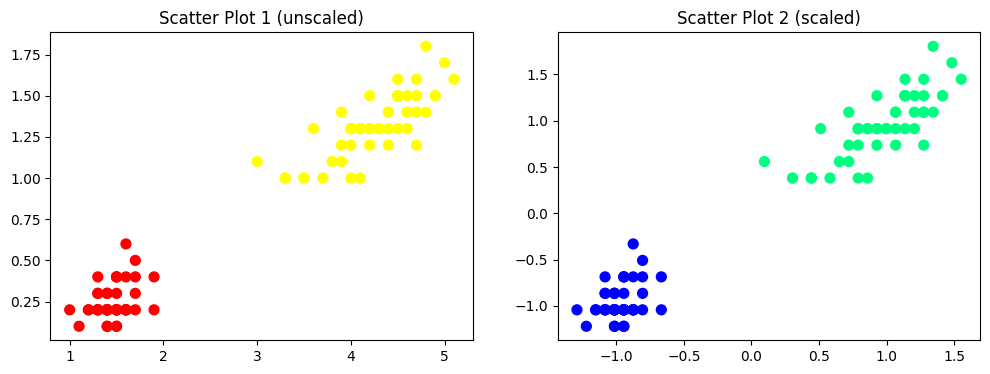

In [ ]:
y = df['target']
x_df = df[['petal length (cm)','petal width (cm)']]
x_scdf = scaled_df[['petal length (cm)','petal width (cm)']]
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row and 2 columns of subplots

# Plot the first scatter plot in the left subplot
axes[0].scatter(x_df['petal length (cm)'], x_df['petal width (cm)'], c=y, s=50, cmap='autumn')
axes[0].set_title('Scatter Plot 1 (unscaled)')

# Plot the second scatter plot in the right subplot
axes[1].scatter(x_scdf['petal length (cm)'], x_scdf['petal width (cm)'], c=y, s=50, cmap='winter')
axes[1].set_title('Scatter Plot 2 (scaled)')

plt.show()

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_unsc = SVC(kernel='linear', C=1E10)
model_unsc.fit(x_df, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_sc = SVC(kernel='linear', C=1E10)
model_sc.fit(x_scdf, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


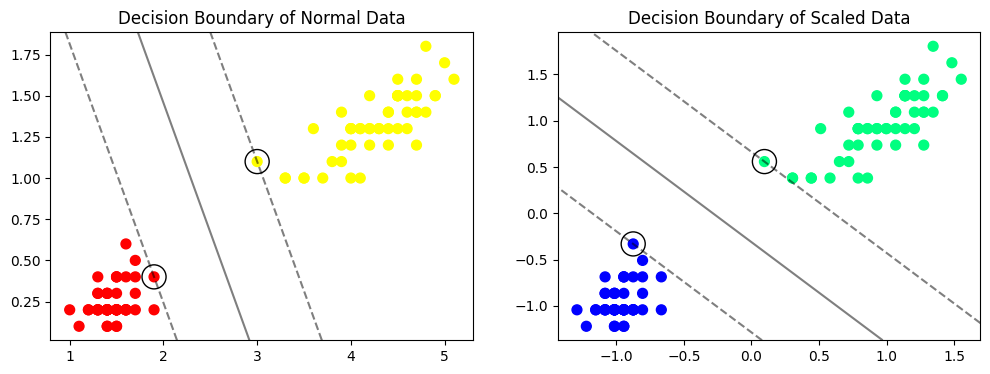

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row and 2 columns of subplots

# Plot the first scatter plot and decision boundary in the left subplot
axes[0].scatter(x_df['petal length (cm)'], x_df['petal width (cm)'], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model_unsc, ax=axes[0])
axes[0].set_title('Decision Boundary of Normal Data')

# Plot the second scatter plot and decision boundary in the right subplot
axes[1].scatter(x_scdf['petal length (cm)'], x_scdf['petal width (cm)'], c=y, s=50, cmap='winter')
plot_svc_decision_function(model_sc, ax=axes[1])
axes[1].set_title('Decision Boundary of Scaled Data')

plt.show()

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_sc1 = SVC(kernel='rbf', C=1E10 , gamma = 0.1)
model_sc1.fit(x_scdf, y)

SVC(C=10000000000.0, gamma=0.1)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_sc2 = SVC(kernel='rbf', C=10 , gamma = 0.1)
model_sc2.fit(x_scdf, y)

SVC(C=10, gamma=0.1)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_sc3 = SVC(kernel='rbf', C=1 , gamma = 0.1)
model_sc3.fit(x_scdf, y)

SVC(C=1, gamma=0.1)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_sc4 = SVC(kernel='rbf', C=0.1 , gamma = 0.1)
model_sc4.fit(x_scdf, y)

SVC(C=0.1, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


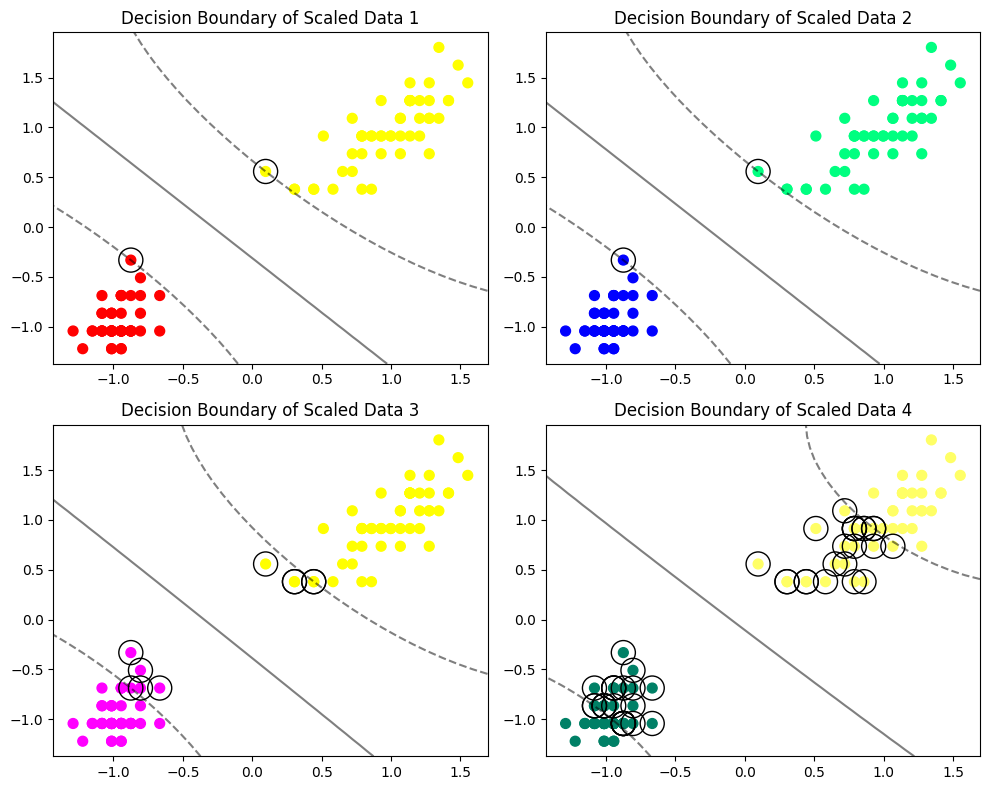

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 1 row and 2 columns of subplots

axes[0,0].scatter(x_scdf['petal length (cm)'], x_scdf['petal width (cm)'], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model_sc1, ax=axes[0,0])
axes[0,0].set_title('Decision Boundary of Scaled Data 1')

axes[0,1].scatter(x_scdf['petal length (cm)'], x_scdf['petal width (cm)'], c=y, s=50, cmap='winter')
plot_svc_decision_function(model_sc2, ax=axes[0,1])
axes[0,1].set_title('Decision Boundary of Scaled Data 2')


axes[1,0].scatter(x_scdf['petal length (cm)'], x_scdf['petal width (cm)'], c=y, s=50, cmap='spring')
plot_svc_decision_function(model_sc3, ax=axes[1,0])
axes[1,0].set_title('Decision Boundary of Scaled Data 3')

axes[1,1].scatter(x_scdf['petal length (cm)'], x_scdf['petal width (cm)'], c=y, s=50, cmap='summer')
plot_svc_decision_function(model_sc4, ax=axes[1,1])
axes[1,1].set_title('Decision Boundary of Scaled Data 4')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_sc5 = SVC(kernel='rbf', C=1E10 , gamma = 0.01)
model_sc5.fit(x_scdf, y)

SVC(C=10000000000.0, gamma=0.01)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_sc6 = SVC(kernel='rbf', C=1E10 , gamma = 0.1)
model_sc6.fit(x_scdf, y)

SVC(C=10000000000.0, gamma=0.1)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_sc7 = SVC(kernel='rbf', C=1E10 , gamma = 1)
model_sc7.fit(x_scdf, y)

SVC(C=10000000000.0, gamma=1)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_sc8 = SVC(kernel='rbf', C=1E10 , gamma = 10)
model_sc8.fit(x_scdf, y)

SVC(C=10000000000.0, gamma=10)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


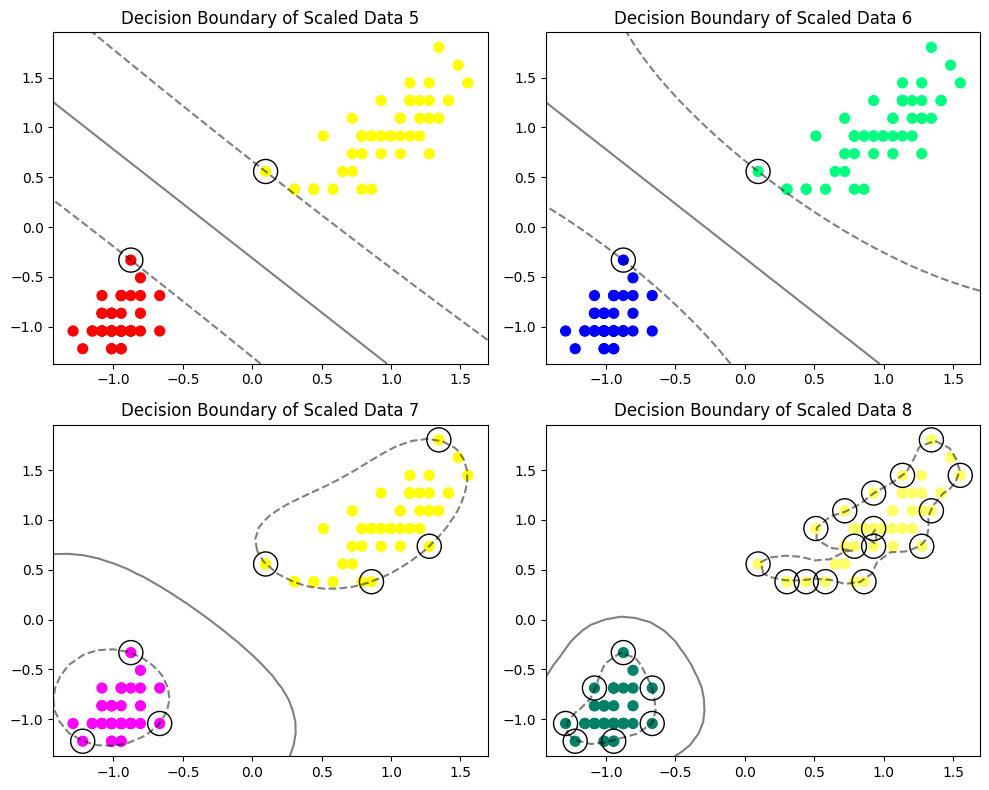

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 1 row and 2 columns of subplots

axes[0,0].scatter(x_scdf['petal length (cm)'], x_scdf['petal width (cm)'], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model_sc5, ax=axes[0,0])
axes[0,0].set_title('Decision Boundary of Scaled Data 5')

axes[0,1].scatter(x_scdf['petal length (cm)'], x_scdf['petal width (cm)'], c=y, s=50, cmap='winter')
plot_svc_decision_function(model_sc6, ax=axes[0,1])
axes[0,1].set_title('Decision Boundary of Scaled Data 6')


axes[1,0].scatter(x_scdf['petal length (cm)'], x_scdf['petal width (cm)'], c=y, s=50, cmap='spring')
plot_svc_decision_function(model_sc7, ax=axes[1,0])
axes[1,0].set_title('Decision Boundary of Scaled Data 7')

axes[1,1].scatter(x_scdf['petal length (cm)'], x_scdf['petal width (cm)'], c=y, s=50, cmap='summer')
plot_svc_decision_function(model_sc8, ax=axes[1,1])
axes[1,1].set_title('Decision Boundary of Scaled Data 8')

plt.tight_layout()
plt.show()

**QUESTION 2**

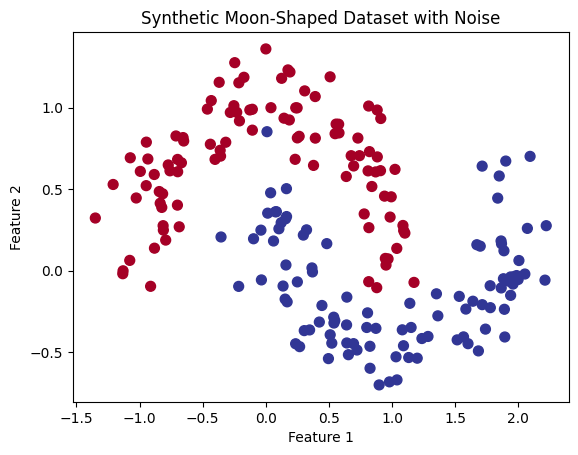

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate the synthetic dataset
x_mm, y_mm = make_moons(n_samples=200, noise=0.15, random_state=42)

# Visualize the dataset
plt.scatter(x_mm[:, 0], x_mm[:, 1], c=y_mm, cmap=plt.cm.RdYlBu, s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Moon-Shaped Dataset with Noise")
plt.show()


In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_mm1 = SVC(kernel='linear', C=1E5)
model_mm1.fit(x_mm, y_mm)

SVC(C=100000.0, kernel='linear')

Text(0.5, 1.0, ' linear Decision Boundary of data')

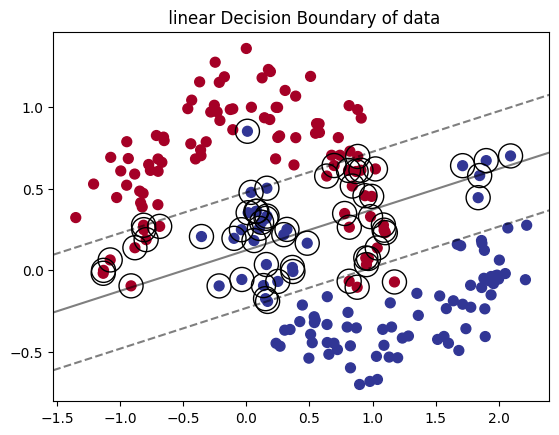

In [ ]:
plt.scatter(x_mm[:, 0], x_mm[:, 1], c=y_mm, cmap=plt.cm.RdYlBu, s=50)
plot_svc_decision_function(model_mm1)
plt.title(' linear Decision Boundary of data')

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_mm2 = SVC(kernel='rbf', C=1E5)
model_mm2.fit(x_mm, y_mm)

SVC(C=100000.0)

Text(0.5, 1.0, ' RBF Decision Boundary of data')

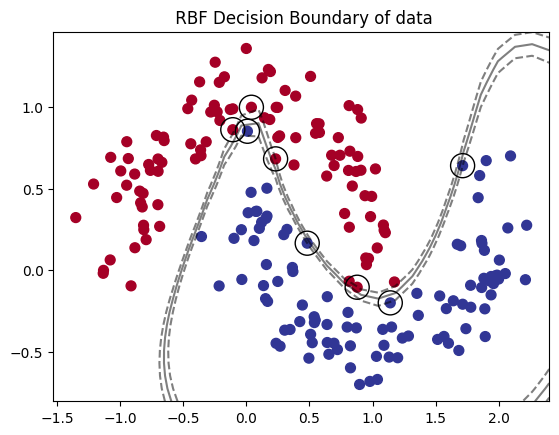

In [ ]:
plt.scatter(x_mm[:, 0], x_mm[:, 1], c=y_mm, cmap=plt.cm.RdYlBu, s=50)
plot_svc_decision_function(model_mm2)
plt.title(' RBF Decision Boundary of data')

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model_mm3 = SVC(kernel='poly', C=1E2 )
model_mm3.fit(x_mm, y_mm)

SVC(C=100.0, kernel='poly')

Text(0.5, 1.0, ' Polynomial Decision Boundary of data')

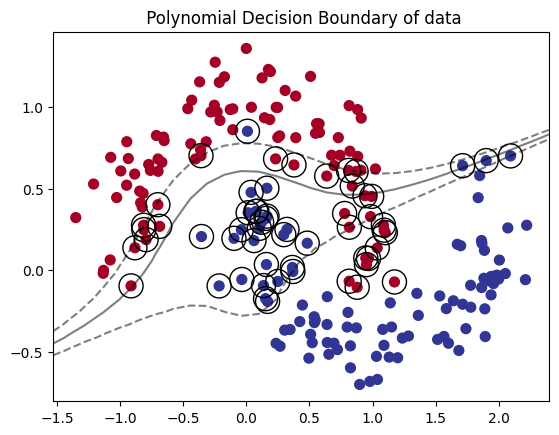

In [ ]:
plt.scatter(x_mm[:, 0], x_mm[:, 1], c=y_mm, cmap=plt.cm.RdYlBu, s=50)
plot_svc_decision_function(model_mm3)
plt.title(' Polynomial Decision Boundary of data')

In [ ]:

from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np


# Split the dataset into training and testing sets
x_mmtrain, x_mmtest, y_mmtrain, y_mmtest = train_test_split(x_mm, y_mm, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10,100,1000],
    'gamma': [0.001, 0.01, 0.1, 1,10],
}

# Create an SVM model with an RBF kernel
svm = SVC(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(x_mmtrain, y_mmtrain)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
best_C = best_params['C']
best_gamma = best_params['gamma']

# Train the SVM model with the best hyperparameters
best_svm = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
best_svm.fit(x_mmtrain, y_mmtrain)

# Evaluate the model on the test set
accuracy = best_svm.score(x_mmtest, y_mmtest)
print("Best Parameters (C, gamma):", best_C, best_gamma)
print("Accuracy on Test Set:", accuracy*100)

Best Parameters (C, gamma): 1 10
Accuracy on Test Set: 97.5


Text(0.5, 1.0, ' RBF Decision Boundary using gridsearch ')

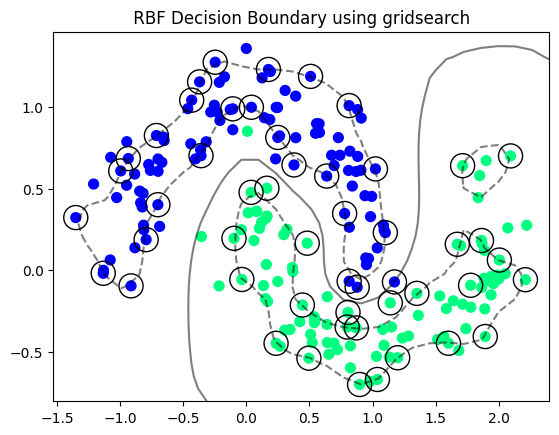

In [ ]:
plt.scatter(x_mm[:, 0], x_mm[:, 1], c=y_mm, cmap='winter', s=50)
plot_svc_decision_function(best_svm)
plt.title(' RBF Decision Boundary using gridsearch ')